# Проект «Прогнозирование выживания на Титанике»

## 1. Прочтём данные

In [217]:
train_data = pd.read_csv('train.csv')
gender_data = pd.read_csv('gender_submission.csv')
test_data = pd.read_csv('test.csv')

def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

Импортируем необходимые библиотеки

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()

## 2. Исследование и предварительная обработка данных

- __Тренировочные данные__

In [219]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [220]:
train_data.shape

(891, 12)

In [221]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [222]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


- Видно, что сущесвуют дубликаты номеров билетов `Ticket` и переиспользуются каюты `Cabins` (уникальных записей (unique) меньше, чем общего количества). Самый большой порядок дубликата билета - "CA. 2343". Он повторился 7 раз. Аналогично, наибjльшее число людей, занимающих одну и ту же каюту - 4. Они используют каюты _"C23 C25 C27"_.
- Также можно заметить, что 644 человека отбыли из порта "S".
- Среди 891 записей, 577 были мужчины (Male) и оставшием женщины (Female).


In [223]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.05,NaN,S
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.00,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
834,835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.30,NaN,S
344,345,0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.00,NaN,S


In [224]:
print(f'Количество дубликатов в тренировочных данных: {train_data.duplicated().sum()}')

Количество дубликатов в тренировочных данных: 0


In [225]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Всего 177 записей с пропущенным возврастом (Age)
- 687 записей с пропущенным значением каюты (Cabin)
- Для 2 записей не заданы порты отправления (Embarked)  


- __Тестовые данные__

In [226]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [227]:
test_data.shape

(418, 11)

In [228]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [229]:
test_data.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
59,951,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C
305,1197,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
109,1001,2,"Swane, Mr. George",male,18.5,0,0,248734,13.0000,F,S
40,932,3,"Karun, Mr. Franz",male,39.0,0,1,349256,13.4167,NaN,C


In [230]:
print(f'Количество дубликатов в тестовых данных: {test_data.duplicated().sum()}')

Количество дубликатов в тестовых данных: 0


In [231]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Всего 86 записей с пропущенным Возрастом (Age), 327 записей с пропущенными Каютами (Cabin) и 1 записьс пропущенной информацией о Цене Fare.

## 3. Зависисмости между признаками

In [232]:
survived = train_data['Survived'].sum()
survived_in_percent = train_data['Survived'].value_counts(normalize=True)[1]
not_survived = train_data['Survived'].count() - survived
not_survived_in_percent = train_data['Survived'].value_counts(normalize=True)[0]
print(f'Выжило: {survived} ({survived_in_percent*100:.1f}%)')
print(f'Не выжило: {not_survived} ({not_survived_in_percent*100:.1f}%)')
print(f'Всего: {train_data.shape[0]}')

Выжило: 342 (38.4%)
Не выжило: 549 (61.6%)
Всего: 891


 - _Проверим зависят ли шансы на спасение от класса_

In [233]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [234]:
train_data.groupby(by='Pclass')['Survived'].value_counts().reset_index()

,Pclass,Survived,count
0,1,1,136
1,1,0,80
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [235]:
train_data[['Pclass', 'Survived']].groupby(by='Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Axes: xlabel='Pclass', ylabel='Survived'>

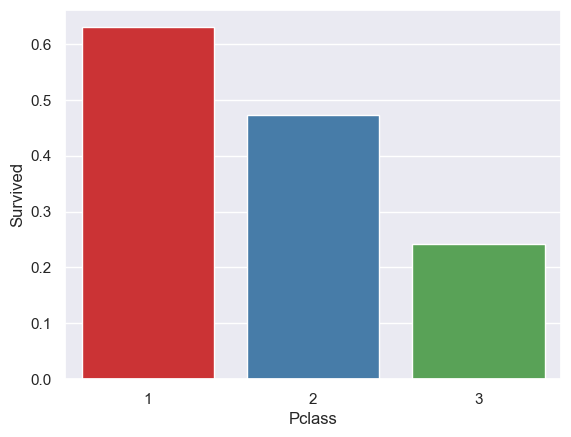

In [236]:
# train_data[['Pclass', 'Survived']].groupby(by='Pclass').mean().plot(kind='bar')

sns.barplot(x='Pclass', y='Survived', data=train_data, ci=False, palette='Set1')

Можно сделать вывод о том, что пассжиры 1го класса имели больше шансов выжить по сравнению с пассажирами 2го и 3го класса. В среднем только один из четырёх пассажиров 3го класса смог выбраться живым.

- _Проверим имеют ли женщины большие шансы на спасение_

In [237]:
train_data['Sex'].value_counts().reset_index()

,Sex,count
0,male,577
1,female,314


In [238]:
train_data.groupby(by='Sex')['Survived'].value_counts().reset_index()

,Sex,Survived,count
0,female,1,233
1,female,0,81
2,male,0,468
3,male,1,109


In [239]:
train_data[['Sex', 'Survived']].groupby(by='Sex', as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<Axes: xlabel='Sex', ylabel='Survived'>

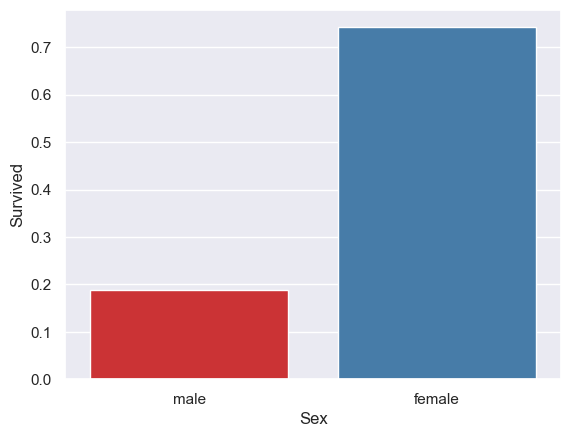

In [240]:
sns.barplot(x='Sex', y='Survived', data=train_data, ci=False, palette='Set1')

Можно увидеть, что выживаемость у женщин оказались значительно выше чем у мужчин

Посмотрим как распределялись люди по полу в каждом классе

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


Text(0, 0.5, 'Percentage')

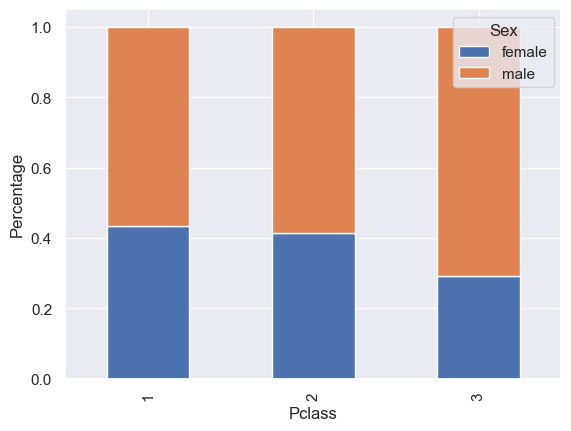

In [241]:
tab = pd.crosstab(train_data['Pclass'], train_data['Sex'])
display(tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

Среди пассажиров 3го класса больше мужчин, а мы помним, что у 3го класса шансы на спасение были меньше, чем у других

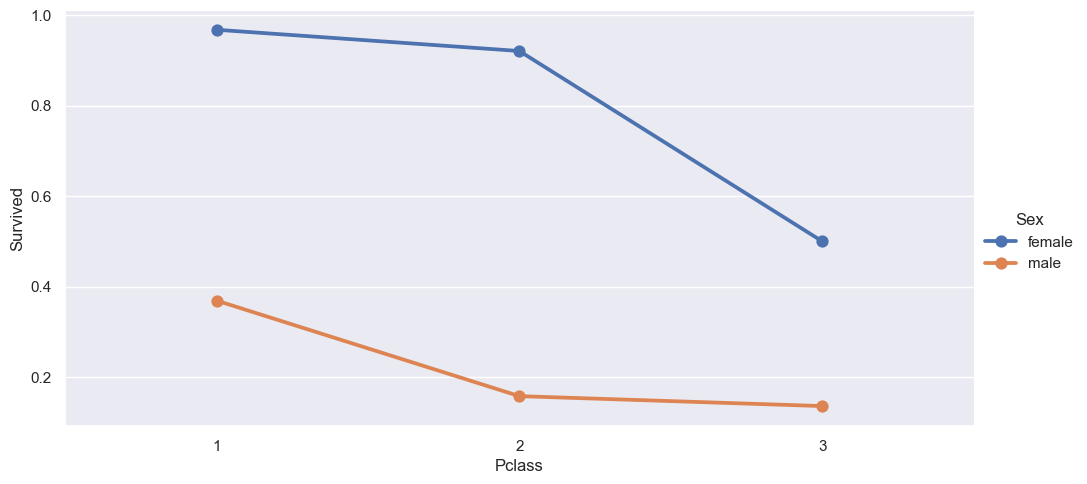

In [242]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', aspect=2, data=train_data, kind='point', ci=False)

Из графика выше, можем видеть, что:
```
- Женщины из 1го и 2го Классов (Pclass) имеют практически 100% шансы на спасение.
- Мужчины из 2го и 3го Классов (Pclass) имеют только около 10% шансов на спасене.
```

- _Исследуем как возвраст влияет на спасение_

<Axes: xlabel='Embarked', ylabel='Age'>

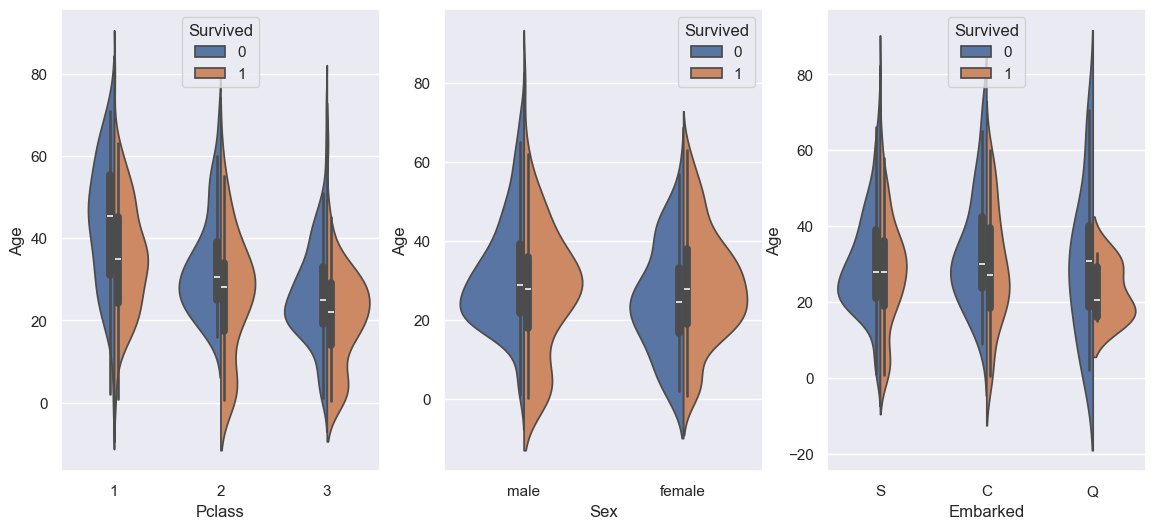

In [243]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train_data, split=True, ax=ax1)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_data, split=True, ax=ax2)
sns.violinplot(x='Embarked', y='Age', hue='Survived', data=train_data, split=True, ax=ax3)

Из графика (.violinplot(..)) по переменной Pclass можно увидеть, что:

- пассажиры 1го класса имеют очень мало детей по сравнению с двумя другими классами.
- пассажиры 1го класса по возрасту намного старше по сравнению с двумя другими классами.
- Почти все дети (в возрасте от 0 до 10) пассажиров 2го класса спаслись.
- Большинству детей пассажиров 3го класса удалось спастись.
- Более молодые люди из первого класса спасались по сравнению к более пожилым.

Из графика (=violinplot) по полу Sex можно увидеть, что:

- Большинство детей мужского пола (в возрасте от 0 до 14) спаслись.
- Девушки и жещины в возрасте от 18 до 40 имели больший шанс на спасение.

#### _Корреляция признаков_

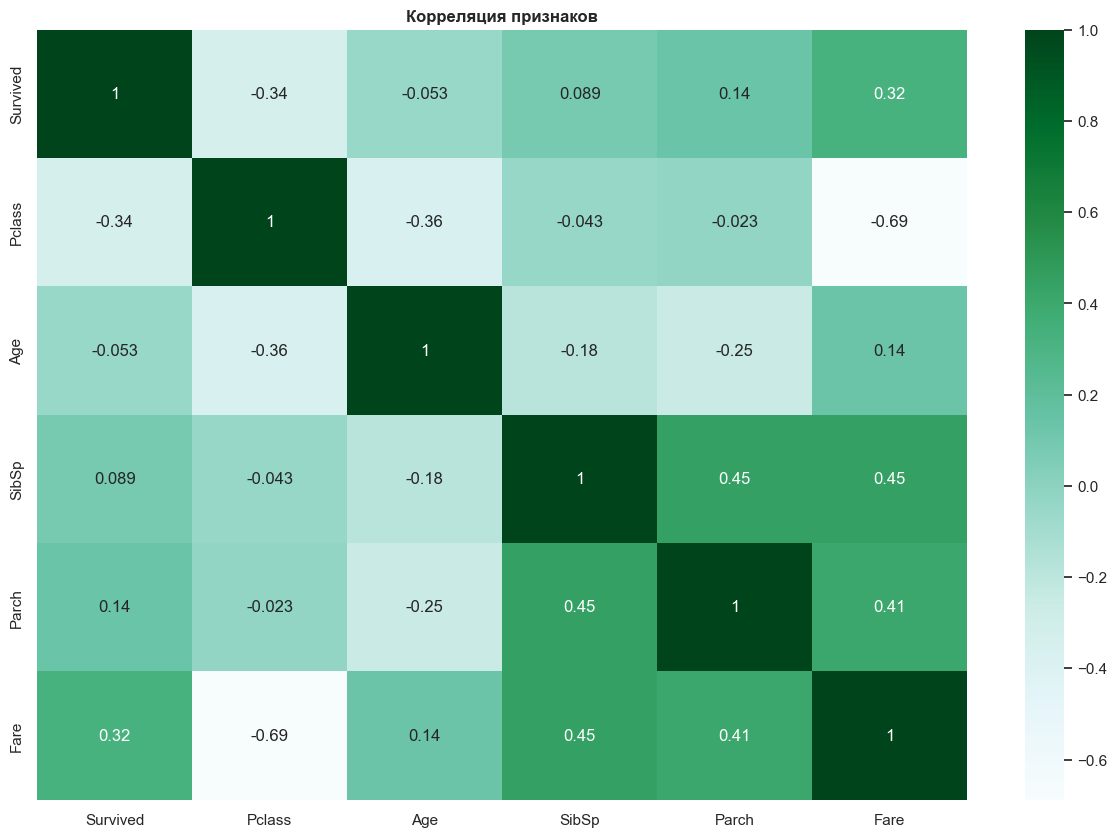

In [244]:
list_numeric = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] 

# Построим тепловую карту корреляции
plt.figure(figsize=(15, 10))
plt.title('Корреляция признаков', weight='bold')
sns.heatmap(train_data[list_numeric].corr(method='spearman'), annot=True, cmap='BuGn')
plt.show()

- Наибольшая положительная корреляция у столбца `Survived` возникает с столбцом цены за билет `Fare`, это говорит нам о том, что чем дороже был билет, тем больше вероятность спасения.

- Наибольшая отрицательная корреляция у столбца `Survived` возникает с столбцом класса билета `Pclass`, следовательно, чем хуже класс билта, тем меньше вероятность на спасение.

### 3.1 Выделение признаков

In [265]:
# Объединим тренировочный и тестовый датасеты
train_test_data = [train_data, test_data]

- ___Преобразуем категоральное значиение столбца `Sex` в численное.___


  0 - женский пол
  1 - мужской пол

In [245]:
from sklearn.preprocessing import OrdinalEncoder

In [246]:
encoder = OrdinalEncoder()

In [261]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [266]:
sex_mapping = {'female': 0, 'male': 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


- ___Преобразуем категоральное значиение столбца `Embarked` в численное.___

В датасетах присутствуют в столбцах Embarked пустые значения ("nan"). Есил так их и оставить, либо же заменить на значение "n/a", то оно будет восприниматься алгоритмами наравне с остальными значениями данного признака.


In [267]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [268]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Видно, что категория "S" содержит максимальное количество пассажиров. Посему, заменяем пустые значения "nan" значением "S".

In [269]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [270]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Теперь можно произвести преобразование и првиести значение Embarked к численному виду. Ставим в соответствие 0 - "S", 1 - "C" и 2 - "Q".

In [271]:
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping).astype(int)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


- ___Преобразуем значиение столбца `Age`.___

Сначала заполняем все пустые (NULL) значение возраста (Age) произвольным числом их диапазона от (mean_age - std_age) и до (mean_age + std_age).

После создадим новый столбец и назовем его AgeBand. Он будет содержать категоризированное значение возраста, распределенное по 5ти разным группам.

In [274]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

for dataset in train_test_data:
    dataset['AgeBand'] = pd.cut(train_data['Age'], 5)

print(train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.528302
1   (16.0, 32.0]  0.352423
2   (32.0, 48.0]  0.378486
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [275]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,1,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,0,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,0,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]"


Теперь ставим в соответствие каждому (Age) группу возрастов (AgeBand)

In [276]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,71.2833,C85,1,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,NaN,0,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,53.1000,C123,0,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]"


In [257]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

- __Fare__

Заменим пропущенные значения столбца `Fare` медианными значениями

In [279]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train_data['Fare'].median())

Создаем столбец `FareBand`. Разделяем значения `Fare` на 4 категории.

In [282]:
for dataset in train_test_data:
    dataset['FareBand'] = pd.qcut(train_data['Fare'], 4)

print(train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [283]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,0,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,71.2833,C85,1,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,NaN,0,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,53.1000,C123,0,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,8.0500,NaN,0,"(32.0, 48.0]","(7.91, 14.454]"


In [284]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,1,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,0,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,0,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,0,"(32.0, 48.0]","(7.91, 14.454]"


- ___Добавим новый признак: размер семьи (`FamilySize`)___

In [285]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] + 1

print(train_data[['FamilySize', 'Survived']].groupby(by='FamilySize', as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


- Семьи размером от 2 до 4 человек имеют более высокие шансы выжить по сравнению с большими по численности семьями, а также по сравнению с людьми путешествующими в одиночку.

In [286]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


Путешествующие водиночку имеют лишь 30% шанс на спасение.

In [287]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FareBand,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,"(16.0, 32.0]","(-0.001, 7.91]",2,0


In [288]:
test_data.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FareBand,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",1,2,0,0,330911,0,NaN,2,"(16.0, 32.0]","(-0.001, 7.91]",1,1


## 4. Отбор признаков

In [289]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'AgeBand', 'FareBand']
train_data = train_data.drop(features_drop, axis=1)
test_data = test_data.drop(features_drop, axis=1)
train_data = train_data.drop('PassengerId', axis=1)

In [290]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,0,3,1,1,0,0,2,0
1,1,1,0,2,3,1,2,0
2,1,3,0,1,1,0,1,1
3,1,1,0,2,3,0,2,0
4,0,3,1,2,1,0,1,1


In [291]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,892,3,1,2,0,2,1,1
1,893,3,0,2,0,0,2,0
2,894,2,1,3,1,2,1,1
3,895,3,1,1,1,0,1,1
4,896,3,0,1,1,0,3,0


Снова посмотрим на матрицу корреляции 

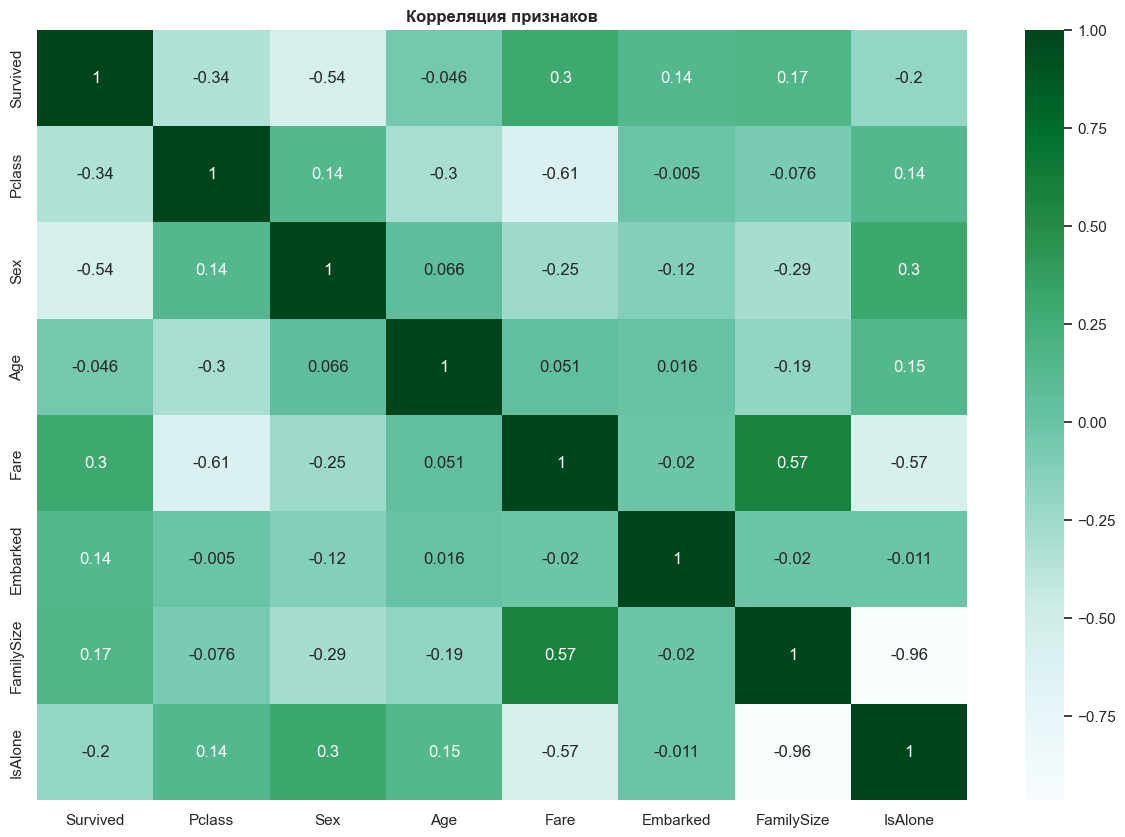

In [293]:
# Построим тепловую карту корреляции
plt.figure(figsize=(15, 10))
plt.title('Корреляция признаков', weight='bold')
sns.heatmap(train_data.corr(method='spearman'), annot=True, cmap='BuGn')
plt.show()

## 5. Моделирование

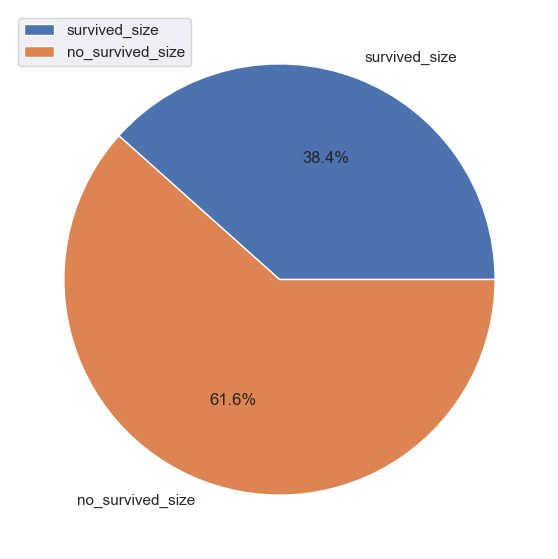

In [294]:
survived_size = (train_data['Survived'] == 1).sum()
no_survived_size = (train_data['Survived'] == 0).sum()

fig, ax = plt.subplots(figsize=(7, 7))

ax.pie([survived_size, no_survived_size], labels=['survived_size', 'no_survived_size'], autopct='%1.1f%%')
ax.legend();

In [302]:
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

X_test = test_data.drop('PassengerId', axis=1).copy()

print(f'Размер X_train: {X_train.shape}\n'
      f'Размер y_train: {y_train.shape}\n'
      f'Размер X_test: {X_test.shape}\n')

Размер X_train: (891, 7)
Размер y_train: (891,)
Размер X_test: (418, 7)



In [338]:
# Импортируем необходимые модели
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

In [313]:
RANDOM_STATE = 1629

#### Логистическая регрессия

In [308]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_log_reg = model.predict(X_test)
acc_log_reg = round(model.score(X_train, y_train)*100, 3)
print(acc_log_reg, '%')

80.135 %


#### Метод опорных векторов (SVM)

In [309]:
model = SVC()
model.fit(X_train, y_train)
y_pred_svc = model.predict(X_test)
acc_svc = round(model.score(X_train, y_train)*100, 3)
print(acc_svc, '%')

82.379 %


#### Линейный SVM

In [317]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred_linear_svc = model.predict(X_test)
acc_linear_svc = round(model.score(X_train, y_train)*100, 3)
print(acc_linear_svc, '%')

79.91 %


#### k-ближайжих соседей

In [329]:
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train, y_train)
y_pred_knn = model.predict(X_test)
acc_knn = round(model.score(X_train, y_train) * 100, 3)
print(acc_knn, '%')

84.624 %


#### Решающие деревья 

In [335]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred_decision_tree = model.predict(X_test)
acc_decision_tree = round(model.score(X_train, y_train) * 100, 3)
print(acc_decision_tree, '%')

87.205 %


In [334]:
best_depth = None
best_score = -1

for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_train, y_train)

    print(f'глубина\t{depth},\t score {score:.3}')

    if best_score < score:
        best_score = score
        best_depth = depth
        
print(f'Лучшая глубина\t{best_depth},\t best_score {best_score:.3}')

глубина	1,	 score 0.787
глубина	2,	 score 0.787
глубина	3,	 score 0.814
глубина	4,	 score 0.822
глубина	5,	 score 0.835
глубина	6,	 score 0.84
глубина	7,	 score 0.851
глубина	8,	 score 0.86
глубина	9,	 score 0.868
глубина	10,	 score 0.87
глубина	11,	 score 0.872
глубина	12,	 score 0.872
глубина	13,	 score 0.872
глубина	14,	 score 0.872
глубина	15,	 score 0.872
глубина	16,	 score 0.872
глубина	17,	 score 0.872
глубина	18,	 score 0.872
глубина	19,	 score 0.872
Лучшая глубина	11,	 best_score 0.872


#### Случайный лес

In [346]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred_random_forest = model.predict(X_test)
acc_random_forest = round(model.score(X_train, y_train) * 100, 3)
print(acc_random_forest, '%')

87.205 %


#### Наивные Байесовские классификаторы (Naive Bayes classifiers)

In [347]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_gnb = model.predict(X_test)
acc_gnb = round(model.score(X_train, y_train)*100, 3)
print(acc_gnb, '%')

77.217 %


## 6. Оценка моделей


#### Матрица ошибок

Построим матрицу ошибок для предсказаний сделанных __Random Forest Classifier__ на тренировочной выборке

Accuracy: 87.205 % 



<Axes: >

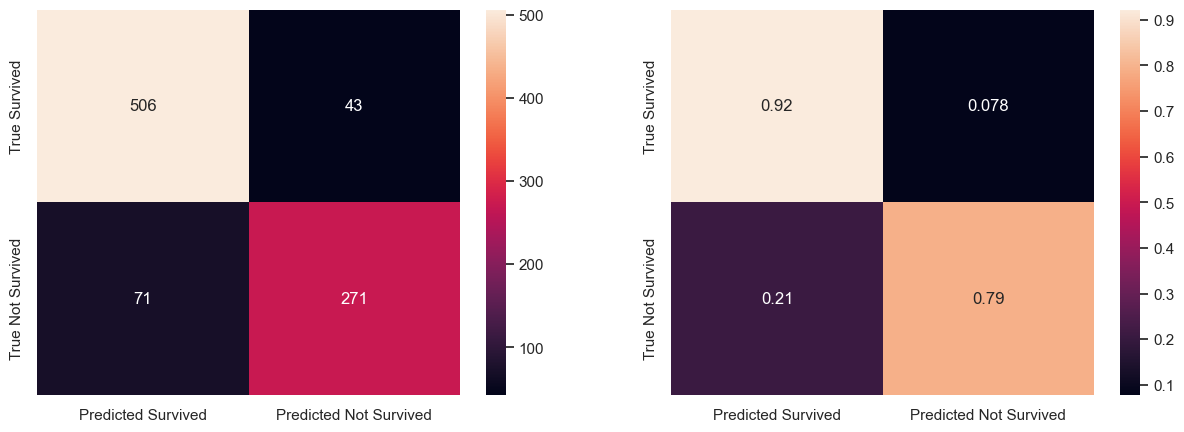

In [350]:
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred_random_forest_train_set = model.predict(X_train)
acc_random_forest = round(model.score(X_train, y_train) * 100, 3)
print (f"Accuracy: {acc_random_forest} % \n")

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_train_set)

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]


true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

### Сравнение моделей

Сравним полученную точность всех моделей, которые использовались выше

In [353]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,87.205
5,Random Forest,87.205
3,KNN,84.624
1,Support Vector Machines,82.379
0,Logistic Regression,80.135
2,Linear SVC,79.910
6,Naive Bayes,77.217


Из таблицы выше видно, что Решающие деревья (Decision Tree) и Рандомный лес (Random Forest) имеют наибольший показатель точности.

Для отправки финального решения мы выбираем из этих двоих классификатор Random Forest т.к. он может противодействовать или хотя бы ограничить overfitting эффект по сравнению с Decision Tree классификатором.

## 7. Создание итогового файла для отправки в Kaggle

По правилам данного соревнования, итоговый файл должен содержать 2 колонки: Id пассажира (PassengerId) и результат предсказания возможного спасения (Survived). Формат представляемых данных – .csv.

Для подготовки данного датасета, мы, очевидно, сначала должны вычислить признак Survived на тестовых данных, а затем привести датасет к требуемому формату.

In [354]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,892,3,1,2,0,2,1,1
1,893,3,0,2,0,0,2,0
2,894,2,1,3,1,2,1,1
3,895,3,1,1,1,0,1,1
4,896,3,0,1,1,0,3,0


In [358]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": y_pred_random_forest
    })

submission.to_csv('submission_titanic.csv', index=False)